<a href="https://colab.research.google.com/github/3zero69/-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~3_pg_50~86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 3 케라스

##01 딥러닝 준비

### 1-1 주요 용어

#### 1-1-1. 하이퍼 파라미터
- 하이퍼파라미터: 딥러닝 뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
- 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라짐 
  - 별도로 설정하지 않으면 기본값 자동 적용
- 튜닝: 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 것
  - 가장 마지막 단계에 튜닝 투자

#### 1-1-2 과소적합 vs 과대적합 (underfitting vs overfitting)

* 머신러닝 학습의 데이터
  - 훈련용 데이터(train): 머신러닝 모델이 학습할 데이터
  - 예측용 데이터(test): 정답 레이블이 없는, 머신러닝 모델이 예측해야 하는 대상 데이터

train 데이터에서 패턴 학습을 통해 모델을 완성. train 데이터를 반복적으로 학습하면서, 패턴을 발견하여 사람보다 예측 성능이 좋은 모델 생성

그러나, 예측 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어진 경우, 예측 성능이 현저히 떨어짐

* **과소적합**: 모델이 충분히 학습되지 않은 경우
* **과대적합**: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
  - 훈련 데이터의 불필요한 노이즈까지 과도하게 모델에 반영
  - 주어진 훈련 데이터에 대한 예측 성능은 좋지만, 예측 데이터에 대한 예측 오차 발생 확률 높음

모델 학습 시에는 과소적합과 과대적합 문제를 최소화하면서 정확도를 높일 수 있도록 해야 함
- 훈련 데이터를 잘 구성해야 함
  - 예측 데이터와 분포가 동일하게 구성
  - 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함
- 훈련 데이터의 일부를 검증 데이터로 활용
  - 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방식으로 최종 모델 결정

#### 1-1-3 에포크(epoch)
**딥러닝** : 데이터셋을 학습하는 과정을 여러 번 반복(iteration) 하면서 최적의 모델 가중치를 찾는 과정

* 에포크(epoch): 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
  - 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면, 1 에포크의 훈련 과정을 마치고 다음 에포크로 넘어감
  - 사전에 설정된 최대 에포크 횟수까지 반복적으로 진행 후 종료
    - 과소적합시, 에포크를 늘려서 다시 학습
    - 반대로 과대적합 구간 진입 시, 에포크를 줄여서 최적 구간에서 학습을 조기에 종료

#### 1-1-4 손실함수(loss function)
**손실함수** : 예측 값과 정답 값의 차이 또는 오차
- 오차: 딥러닝 모델의 출력 값과 실제 값의 차이

분류/회귀 모델에 따라 손실함수를 다르게 적용

* 지도학습의 분류 
1. 이진 분류
  - `binary_crossentropy` 손실함수 
  - 출력층 활성화 함수: sigmoid
2. 다중 분류
  - `categorical_crossentropy` 손실함수 : 다중 분류의 대상이 되는 클래스가 원핫 벡터 인 경우
  - `sparse_categorical_crossentropy` 손실함수 : 정답 클래스가 원핫 인코딩이 아닌 레이블 값으로 표현되어 서로 다른 숫자로 구분되어 있는 경우
  - 출력층의 활성화 함수: softmax

* 회귀 모델
  - `mean_squared_error`
  - `mean absolute_error`
  - huber



```
import tensorflow as tf

# 클래스
tk.keras.losses.BinaryCrossentropy()

# 함수
tk.keras.losses.binary_crossentropy
```



#### 1-1-5 경사하강법(Gradient Descent)

**경사하강법**: 딥러닝 모델 훈련 시, (1) 모델 내부의 가중치에 대한 미분 값을 구하고 (2) 목적 함수 값이 낮아지는 방향으로 차감하면서 (3) 결국 최소 함수 값을 갖도록 하는 방법

- 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음
- 다양한 옵티마이저(최적화 함수)의 근간이 되는 알고리즘


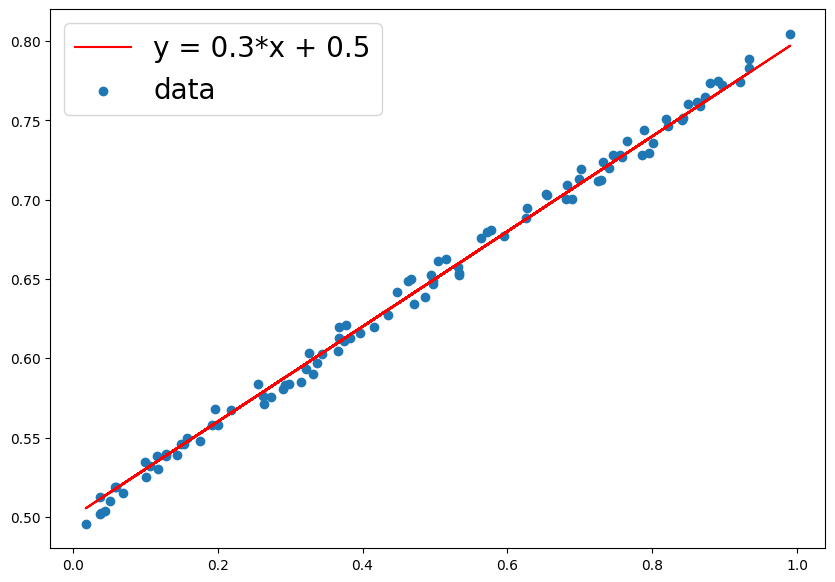

w:0.3,b:0.5


In [1]:
#@title 경사하강법 구현 (Numpy)

import numpy as np 
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
#@title 최적화(Numpy) 
# 최대 반복 횟수 지정 및 오차가 0.005 이내로 수렴 시 반복문 종료
# 반복문 안에서 손실함수 정의 및 매 에포크마다 w, b에 대한 가중치 업데이트

# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.59217, b = 0.35930 error = 0.34953
 5 w = 0.54810, b = 0.37526 error = 0.24490
10 w = 0.51264, b = 0.39310 error = 0.17865
15 w = 0.48241, b = 0.40835 error = 0.13044
20 w = 0.45661, b = 0.42137 error = 0.09534
25 w = 0.43460, b = 0.43247 error = 0.06979
30 w = 0.41583, b = 0.44194 error = 0.05120
35 w = 0.39981, b = 0.45003 error = 0.03766
40 w = 0.38614, b = 0.45692 error = 0.02781
45 w = 0.37448, b = 0.46280 error = 0.02064
50 w = 0.36453, b = 0.46782 error = 0.01542
55 w = 0.35604, b = 0.47211 error = 0.01162
60 w = 0.34880, b = 0.47576 error = 0.00885
65 w = 0.34262, b = 0.47888 error = 0.00684
70 w = 0.33735, b = 0.48153 error = 0.00537
------------------------------------------------------------
72 w = 0.3, b = 0.5 error = 0.00490


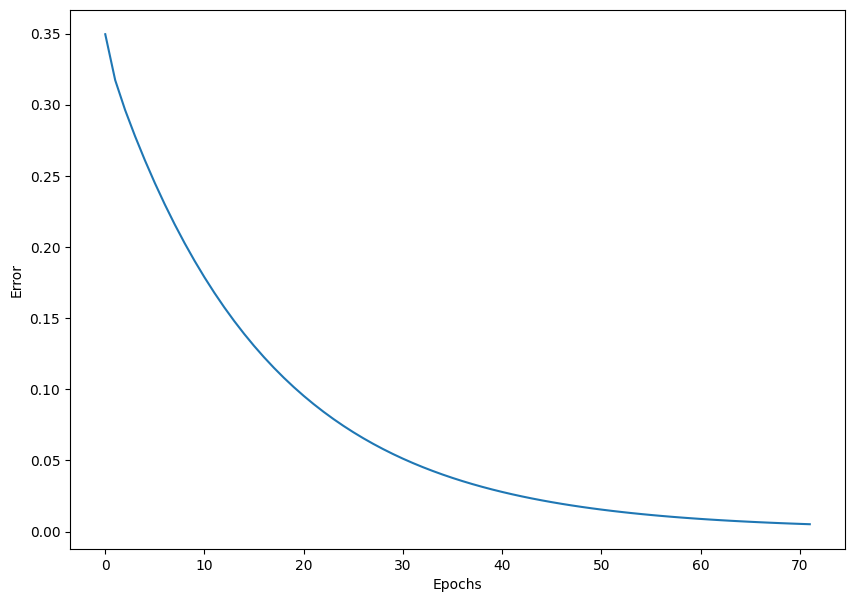

In [3]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()     

> - 가중치가 난수 값에 의하여 다르게 초기화
-  매번 실행 시마다 수렴하는 속도 차이
- 하지만 결국 목표 오차 범위 안으로 수렴하여 반복문 종료
- 종료 후 w, b의 계수 확인하면 샘플 데이터셋 생성시 설정한 값과 비슷함


### 1-2 딥러닝 프로세스

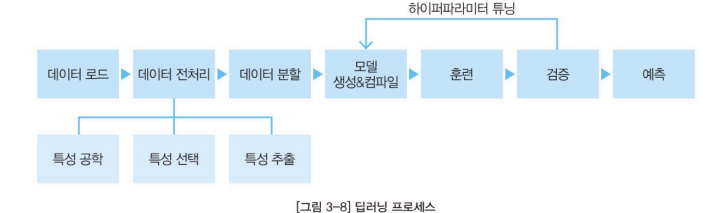

#### 1-2-1 데이터 전처리
데이터를 가공하는 단계
- 배열의 차원 변경, 스케일 조정
- 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터 셋의 형태를 올바르게 정의할 수 있음

#### 1-2-2 모델 생성
모델의 구조를 정의하고 생성하는 단계
1. Sequential API : 순차적인 구조의 모델
2. Functional API /Model Subclassing: 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델


#### 1-2-3 모델 컴파일
생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이터(optimizer), 평가지표(metrics) 정의
- 모델 인스턴스에 complie() 메소드 적용

#### 1-2-4 모델 훈련
모델을 훈련하는 단계 
- fit() 함수: 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
  - train/test data, epoch, 배치(batch) 크기, callback 함수

#### 1-2-5 모델 검증
훈련이 완료된 모델을 검증하는 단계
- 모델 훈련시 사용하지 않은 **검증 데이터셋**을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표 계산
  - 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어짐
  - 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정, 컴파일 및 훈련 과정을 거쳐 재평가
- 목표 성능에 도달할 때까지 반복

#### 1-2-6 모델 예측
훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과 반환

## 02 단순 신경망 훈련

### 2-1 선형회귀
* 회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
* 단순선형회귀 모형: 하나의 X가 Y에 미치는 영향 추정, 1차 함수 관계

${y = wx+b}$
- X: 독립변수 /Y: 종속변수
- w: 가중치
- b: 편향

모델의 가중치와 편향을 업데이트 하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해 나감

### 2-2 뉴런
- 신경망: 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
  - 뉴런(노드): 인공 신경망 모델을 구성하는 하나의 신경
    - 뉴런의 내부에는 가중치가 존재
    - 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트

> TIP) 역전파 알고리즘: 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법
 - 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장
   - 그래디언트: 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과

### 2-3 Dense 레이어
* Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
  - 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(Fully Connected Layer)라고 불림

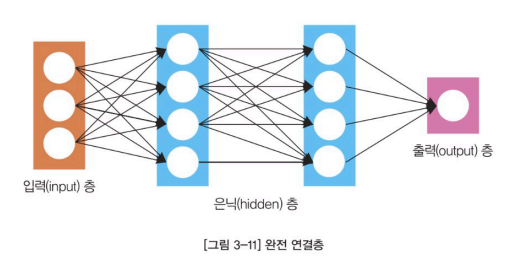


> 4개의 Dense 레이어 구성 모델

Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정

```
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')
```



### 2-4 데이터셋 만들기

In [4]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


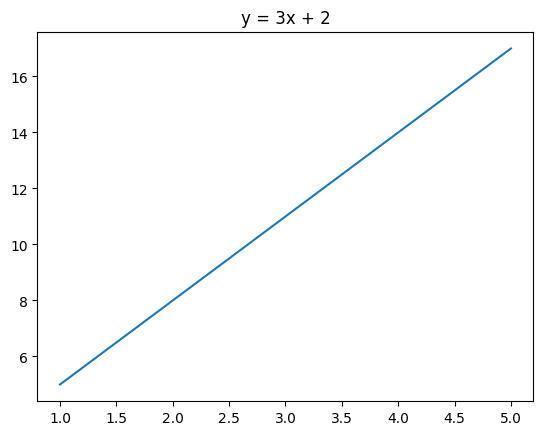

In [5]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### 2-5 Sequential API

층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 가짐
- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입, 순서대로 각 층을 통과하면서 딥러닝 연산 수행

다만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음
- Functional API 이용


#### 2-5-1 모델 구조

1. 리스트형 정의   
: sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력
- 앞에 위치한 층부터 연산 먼저 처리, 순차적으로 다음 층의 연산 수행

In [7]:
import tensorflow as tf

# 리스트형 - [ ] 안에 쉼표로 구분하여 층을 쌓음
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

2. add() 함수로 레이어 추가
: 여러 개의 층 추가하려면 add 함수 반복해서 여러번 사용

In [8]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2 입력 데이터 형태
Sequential API 모델 구성 시, 첫번째 층은 **input_shape 매개변수**를 지정해야 함!
  - input_shape 매개변수: 투플 혹은 리스트 형태

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

> shape(150,4) : 150개 샘플에 대해 4개의 입력 변수 존재

- 행: 샘플 데이터
- 열: 입력 변수

#### 2-5-3 단순선형호귀 모델 정의
- 1개의 뉴런을 가지는 Dense 레이어 한 개 사용
  - 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐

- 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 y에 대한 모델의 예측값

In [10]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1]) 
])

> input_shape=[1] : 1차 함수식에서 입력 데이터는 x 값을 나나태는 입력 변수 1개만 존재



### 2-6 모델 요약


In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


> 단순선형회귀모델 업데이트 파라미터: 가중치 w, 편향 b 
* total params : 모델 내부에 존재하는 모든 파라미터의 합계
* trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
* non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수



### 2-7 컴파일

In [12]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [13]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [14]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [15]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8,9,10 훈련, 검증, 예측

In [16]:
# 훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 508ms/step - loss: 104.7136 - mae: 9.5875
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 61.1308 - mae: 7.3665
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 35.7321 - mae: 5.6709
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 20.9302 - mae: 4.3763
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.3037 - mae: 3.3879


In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

In [ ]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

> - 첫 10 epoch 까지 손실이 급격히 감소
- 10 epoch 를 넘어가면 감소 폭이 둔화되면서 조금씩 감소

모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가, 일정 epoch 이후에는 학습 속도가 느려지는 패턴

In [18]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 355ms/step - loss: 8.8086e-05 - mae: 0.0081


[8.808636630419642e-05, 0.008055591955780983]

In [20]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 150ms/step


array([[32.038933]], dtype=float32)

## 03 심층 신경망으로 이미지 분류

### 3-1 케라스 내장 데이터셋 로드


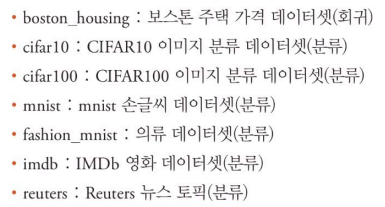


In [21]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

넘파이 배열로 데이터셋 다운로드 - load_data()

In [22]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [23]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


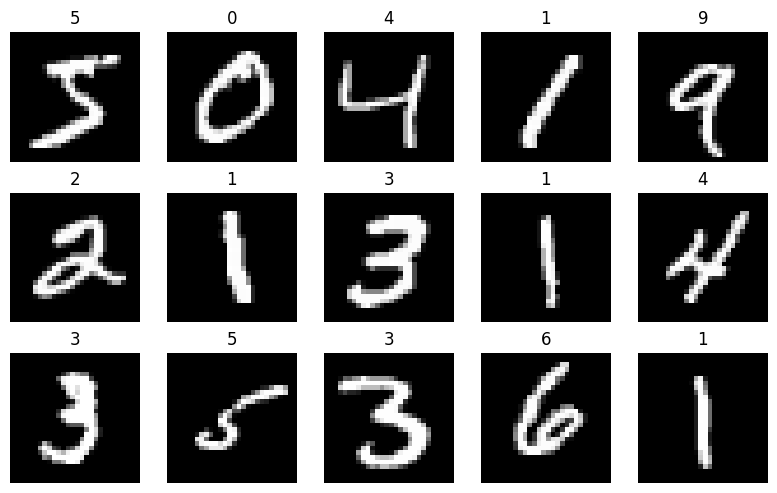

In [24]:
#데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

정규화를 통해 데이터의 범위 조절
  - 정규화 하는 이유: 경사하강법 알고리즘에 의한 수렴 속도가 더 빠름


>  x_train: 넘파이 배열, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭

In [25]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

> * 0-255 범위의 값 ->  0-1을 가지도록 정규화 
   - 최댓값 255로 나눔

In [26]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [27]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [28]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어

* 문제점
  - 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨
  - 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음. 


이미지 데이터를 1차원으로 전처리 해야 함

In [29]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


다차원 데이터를 1차원으로 펼쳐주는 방법

In [30]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


### 3-4 활성화 함수

**활성화 함수(Activation Function)** : 입력을 비선형 출력으로 변환해주는 함수

- 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현
- 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면, 모델을 깊게 구성하더라도 결국은 선형함수 표현

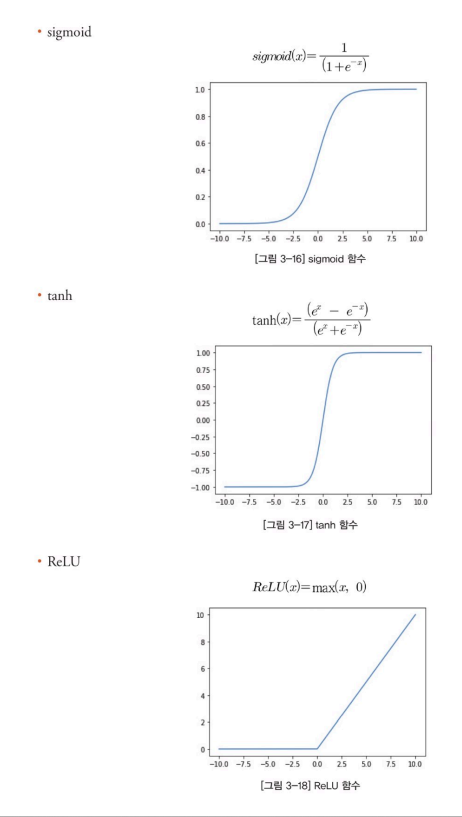

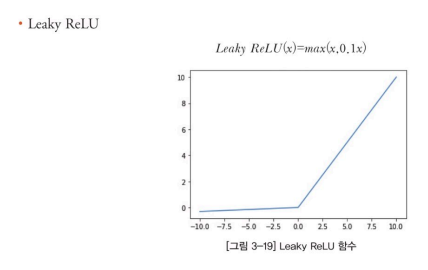

In [31]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

별도의 층처럼 적용
- Dense 레이어 다음에 배치 정규화(Batch Normalization)을 적용한 후, 활성화 함수를 적용하고자 할 때 많이 사용

In [32]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력

In [33]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) - 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [34]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

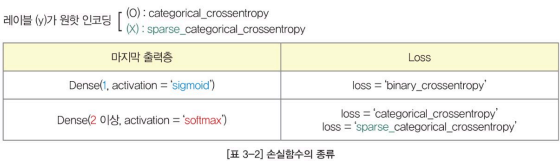

**이진 분류기(binary classifier)** 
- 출력층의 노드 개수 1개: activation = 'sigmoid' /loss = 'binary_crossentropy'

In [35]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

* 출력층 노드 개수 2개: activation = 'softmax' /loss = 'categorical_crossentropy', 'sparse_categorical_crossentropy'

In [37]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저
**옵티마이저** : 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법

In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8 평가지표

* 분류 모델 평가지표: accuracy, auc, precision, recall


In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])
     

In [40]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9,10,11 훈련, 평가, 예측

In [41]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2272 - accuracy: 0.9317 - val_loss: 0.1179 - val_accuracy: 0.9648
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.0860 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0665 - accuracy: 0.9793 - val_loss: 0.0752 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0876 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0752 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0799 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0798 - val_ac

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9803
검증 셋 정확도: 0.9803000092506409


In [43]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [44]:
# 예측 결과 출력
predictions[0]

array([4.3609122e-12, 5.3110034e-07, 8.4228759e-08, 2.5899531e-06,
       5.1728776e-08, 2.9296077e-10, 6.9642139e-12, 9.9999303e-01,
       1.6760085e-08, 3.6452886e-06], dtype=float32)

In [45]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


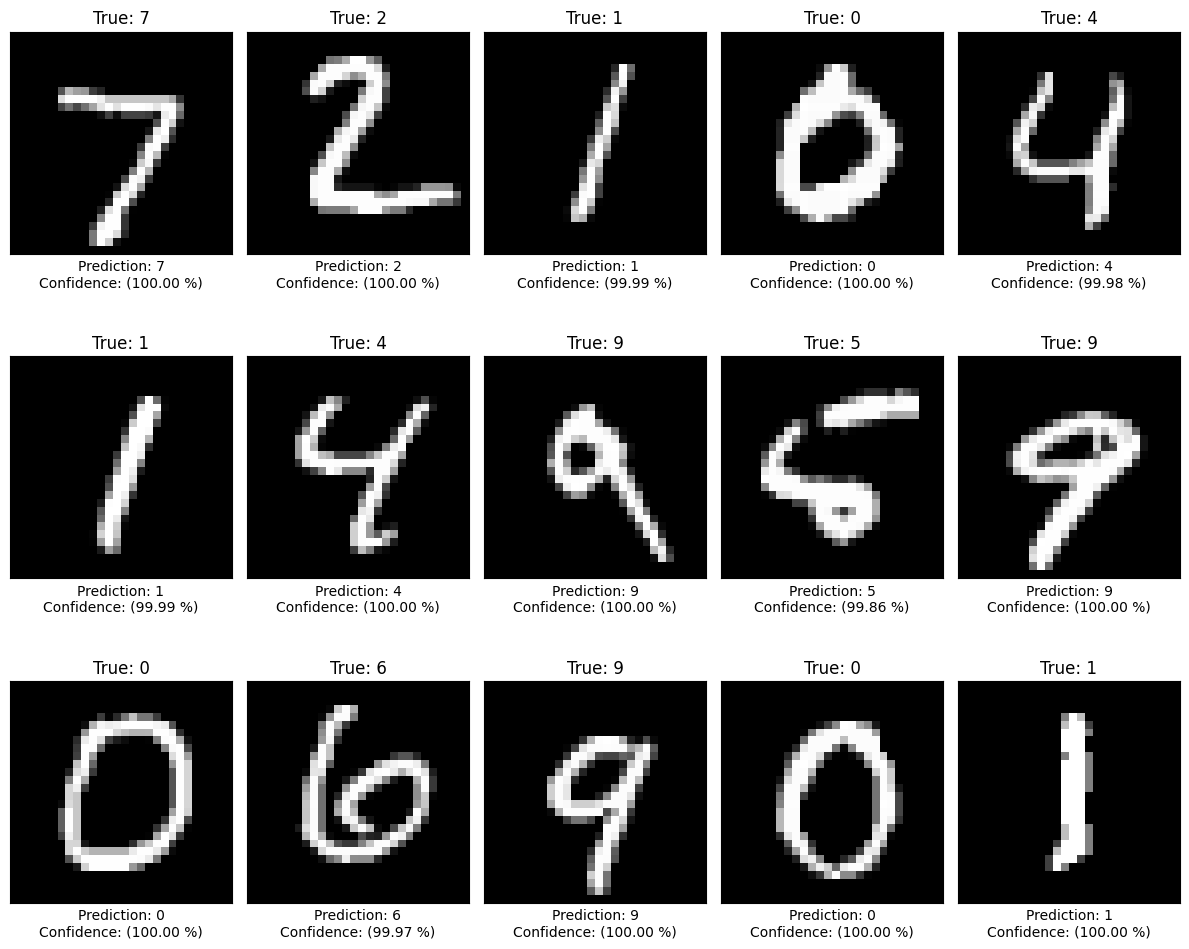

In [46]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()